# Курс «Фреймворк PyTorch для разработки искусственных нейронных сетей»

## Урок 1. Введение в PyTorch

### Домашняя работа к уроку 1

In [1]:
# !pip install torch===1.6.0 torchvision===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.autograd import Variable
from torch import nn 
from torch import optim

#### Задание 1

Добиться вразумительного результата от модели, собранной на занятии (3 угаданные картинки из 4 предложенных на семинаре). Варианты изменений:  
    a.	изменение слоёв и их количества;  
    b.	изменение метода оптимизации;  
    c.	изменение процесса обучения;  
    d.	для продвинутых: преобразование данных.

Задали устройство

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


Задали трнсформер

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

Загрузили тренировочный набор данных

In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


Загрузили тестовый набор данных

In [6]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified


Задали названия классов

In [7]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Задаем нейронную сеть

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [9]:
net = Net().to(device)

Задаем функцию потерь и оптимизатор

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Обучаем сеть

In [11]:
losses =[]
for epoch in range(100):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs).to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            losses.append(running_loss / 2000)
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.241
[1,  4000] loss: 1.900
[1,  6000] loss: 1.685
[1,  8000] loss: 1.585
[1, 10000] loss: 1.536
[1, 12000] loss: 1.453
[2,  2000] loss: 1.404
[2,  4000] loss: 1.378
[2,  6000] loss: 1.361
[2,  8000] loss: 1.310
[2, 10000] loss: 1.307
[2, 12000] loss: 1.295
[3,  2000] loss: 1.228
[3,  4000] loss: 1.210
[3,  6000] loss: 1.225
[3,  8000] loss: 1.205
[3, 10000] loss: 1.193
[3, 12000] loss: 1.195
[4,  2000] loss: 1.118
[4,  4000] loss: 1.118
[4,  6000] loss: 1.117
[4,  8000] loss: 1.109
[4, 10000] loss: 1.126
[4, 12000] loss: 1.105
[5,  2000] loss: 1.037
[5,  4000] loss: 1.033
[5,  6000] loss: 1.057
[5,  8000] loss: 1.042
[5, 10000] loss: 1.054
[5, 12000] loss: 1.089
[6,  2000] loss: 0.977
[6,  4000] loss: 0.977
[6,  6000] loss: 0.997
[6,  8000] loss: 1.011
[6, 10000] loss: 0.994
[6, 12000] loss: 1.005
[7,  2000] loss: 0.907
[7,  4000] loss: 0.946
[7,  6000] loss: 0.951
[7,  8000] loss: 0.950
[7, 10000] loss: 0.969
[7, 12000] loss: 0.979
[8,  2000] loss: 0.863
[8,  4000] 

[58,  6000] loss: 0.618
[58,  8000] loss: 0.635
[58, 10000] loss: 0.658
[58, 12000] loss: 0.640
[59,  2000] loss: 0.539
[59,  4000] loss: 0.609
[59,  6000] loss: 0.630
[59,  8000] loss: 0.615
[59, 10000] loss: 0.621
[59, 12000] loss: 0.660
[60,  2000] loss: 0.536
[60,  4000] loss: 0.579
[60,  6000] loss: 0.621
[60,  8000] loss: 0.637
[60, 10000] loss: 0.630
[60, 12000] loss: 0.654
[61,  2000] loss: 0.549
[61,  4000] loss: 0.550
[61,  6000] loss: 0.630
[61,  8000] loss: 0.607
[61, 10000] loss: 0.674
[61, 12000] loss: 0.689
[62,  2000] loss: 0.577
[62,  4000] loss: 0.617
[62,  6000] loss: 0.593
[62,  8000] loss: 0.632
[62, 10000] loss: 0.644
[62, 12000] loss: 0.660
[63,  2000] loss: 0.577
[63,  4000] loss: 0.604
[63,  6000] loss: 0.598
[63,  8000] loss: 0.653
[63, 10000] loss: 0.661
[63, 12000] loss: 0.641
[64,  2000] loss: 0.543
[64,  4000] loss: 0.589
[64,  6000] loss: 0.635
[64,  8000] loss: 0.645
[64, 10000] loss: 0.646
[64, 12000] loss: 0.622
[65,  2000] loss: 0.556
[65,  4000] loss

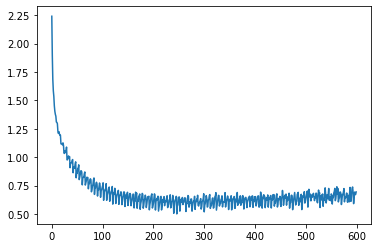

In [13]:
plt.plot(losses)
plt.show()

Примерно после 30 эпох лосс прекращает существенно уменьшаться. Это означает, что модель обучилась.

Сохраним модель

In [14]:
PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

Посмотрим структуру модели

In [17]:
data_iter = iter(testloader)
images, labels = data_iter.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane


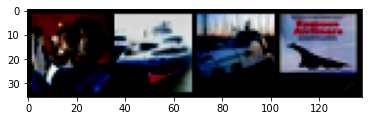

In [20]:
outputs = net(images.to(device)).to(device)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [24]:
for i in range(4):
    print(classes[labels[i]])

cat
ship
ship
plane


"Угадали" все картинки.

#### Задание 2

Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме, как обучали модель в конце занятия.

In [107]:
linear = nn.Linear(2, 2)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

x = Variable(torch.randn(2), requires_grad = True)
y = Variable(torch.randn(2), requires_grad = False)

dataset = torch.utils.data.TensorDataset(x, y)
loader = torch.utils.data.DataLoader(dataset, batch_size=2, pin_memory=True)

for epoch in range(10):
    for i, data in enumerate(loader):
        inputs, labels = data[0], data[1]
        optimizer.zero_grad()
        pred = linear(inputs)
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        print('[%d] loss: %.10f' % (epoch + 1, running_loss / 2000))
        running_loss = 0.0
        
print('Finished Training')

[1] loss: 0.0000186708
[2] loss: 0.0000177132
[3] loss: 0.0000168047
[4] loss: 0.0000159428
[5] loss: 0.0000151251
[6] loss: 0.0000143494
[7] loss: 0.0000136134
[8] loss: 0.0000129152
[9] loss: 0.0000122528
[10] loss: 0.0000116244
Finished Training


#### Задание 3

Переписать эту программу на PyTorch:

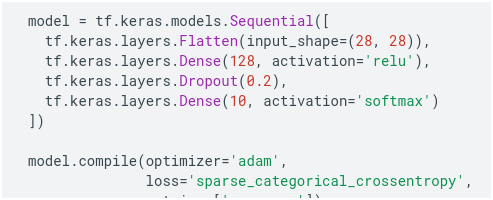

Не забудьте про реализацию функции forward!

In [109]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.f1 = nn.Flatten((28, 28),128)
        self.l1 = nn.Linear(128, 128)
        self.d1 = nn.Dropout(0.2)
        self.l2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.f1(x)
        x = F.relu(self.l1(x))
        x = self.d1(x)
        x = F.softmax(self.l2(x))
        return x


net = Net().to('cpu')